In [394]:
! pip list
! pip install autoviz
! pip install sweetviz
! pip install pandas_profiling --upgrade

Package                            Version
---------------------------------- -------------------
-atplotlib                         3.3.4
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
autoviz                            0.1.36
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Nileema\\anaconda3\\Lib\\site-packages\\matplotlib\\_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Nileema\\anaconda3\\Lib\\site-packages\\matplotlib\\_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Nileema\\anaconda3\\Lib\\site-packages\\matplotlib\\_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [396]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
import sys
import seaborn as sns

In [397]:
os.listdir()

['.ipynb_checkpoints',
 'filtered_loan_default.csv',
 'FinalReport.html',
 'Loan Prediction Assignment.ipynb',
 'Loan Prediction Assignment1.ipynb',
 'loan_data.csv',
 'loan_data0.csv',
 'loan_default_profiling.html',
 'loan_prediction',
 'raw_loan_default.csv',
 'Untitled.ipynb']

In [398]:
url = "https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/master/loans_2007.csv"
raw_data = pd.read_csv(url)

C:\Users\Nileema\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [399]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [400]:
raw_data.to_csv("raw_loan_default.csv",index=False)

In [401]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [402]:
raw_data.shape

(42538, 52)

In [403]:
raw_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [404]:
features_1st_13_set = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']


In [405]:
raw_data.loc[:5,features_1st_13_set]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT


In [406]:
drop_col_1st_set = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title']

In [407]:
features_2nd_13_set=['annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths']

In [408]:
raw_data.loc[:5,features_2nd_13_set]

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths
0,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0
1,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0
2,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0
3,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0
4,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0
5,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0


In [409]:
drop_2nd_set=['issue_d','zip_code']

In [410]:
features_3rd_13_set=[ 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee']

In [411]:
raw_data.loc[:5,features_3rd_13_set]

,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00
1,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00
2,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00
3,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97
4,15.0,0.0,27783.0,53.9%,38.0,f,73.71,73.71,3987.860000,3987.86,2926.29,1061.57,0.00
5,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00


In [412]:
drop_col_3rd_set = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

In [413]:
features_4th_13_set=['recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens']

In [414]:
raw_data.loc[:5,features_4th_13_set]

,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.0,0.00,Jan-2015,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,Jun-2014,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,Dec-2016,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,Jan-2015,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [415]:
drop_4th_set=['recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt']

In [416]:
columns_to_drop = drop_col_1st_set+drop_4th_set +drop_col_3rd_set+drop_2nd_set

In [417]:
filtered_data=raw_data.drop(columns_to_drop , axis=1)

In [418]:
filtered_data.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [419]:
filtered_data.shape

(42538, 32)

In [420]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

In [421]:
filtered_data.to_csv("filtered_loan_default.csv" , index=False)

In [422]:
filtered_data["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [423]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [424]:
pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp38-cp38-win_amd64.whl (9.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Nileema\\anaconda3\\Lib\\site-packages\\matplotlib\\_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



<ipython-input-425-04291c6e29d0>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


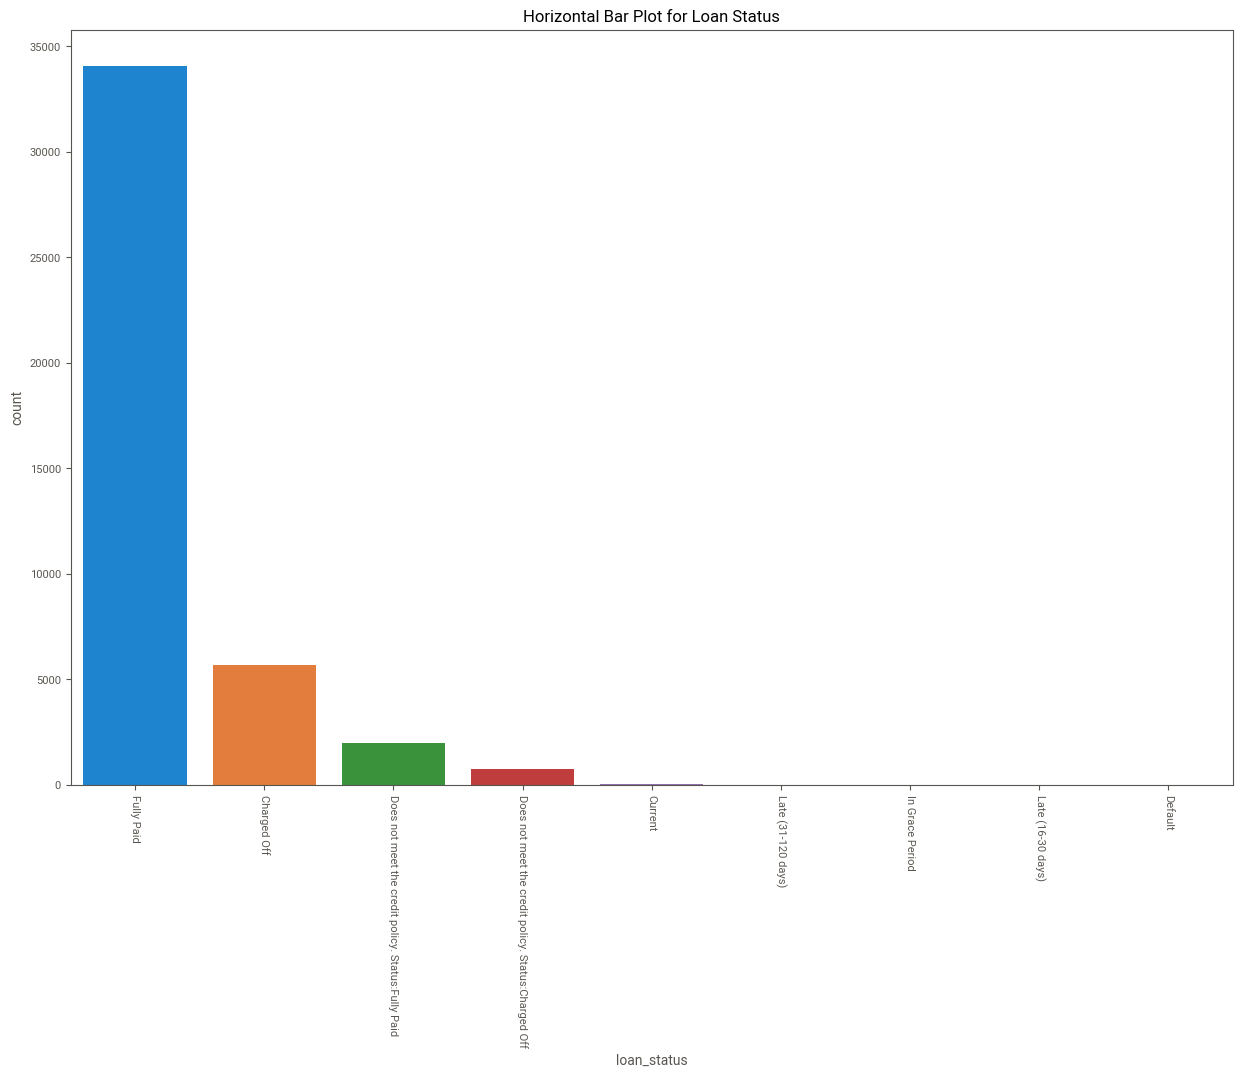

In [425]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="loan_status", data=filtered_data,order =filtered_data["loan_status"].value_counts().index)
plt.title("Horizontal Bar Plot for Loan Status")
plt.xticks(rotation=270)
plt.show()

<ipython-input-426-37a62fd4dd07>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


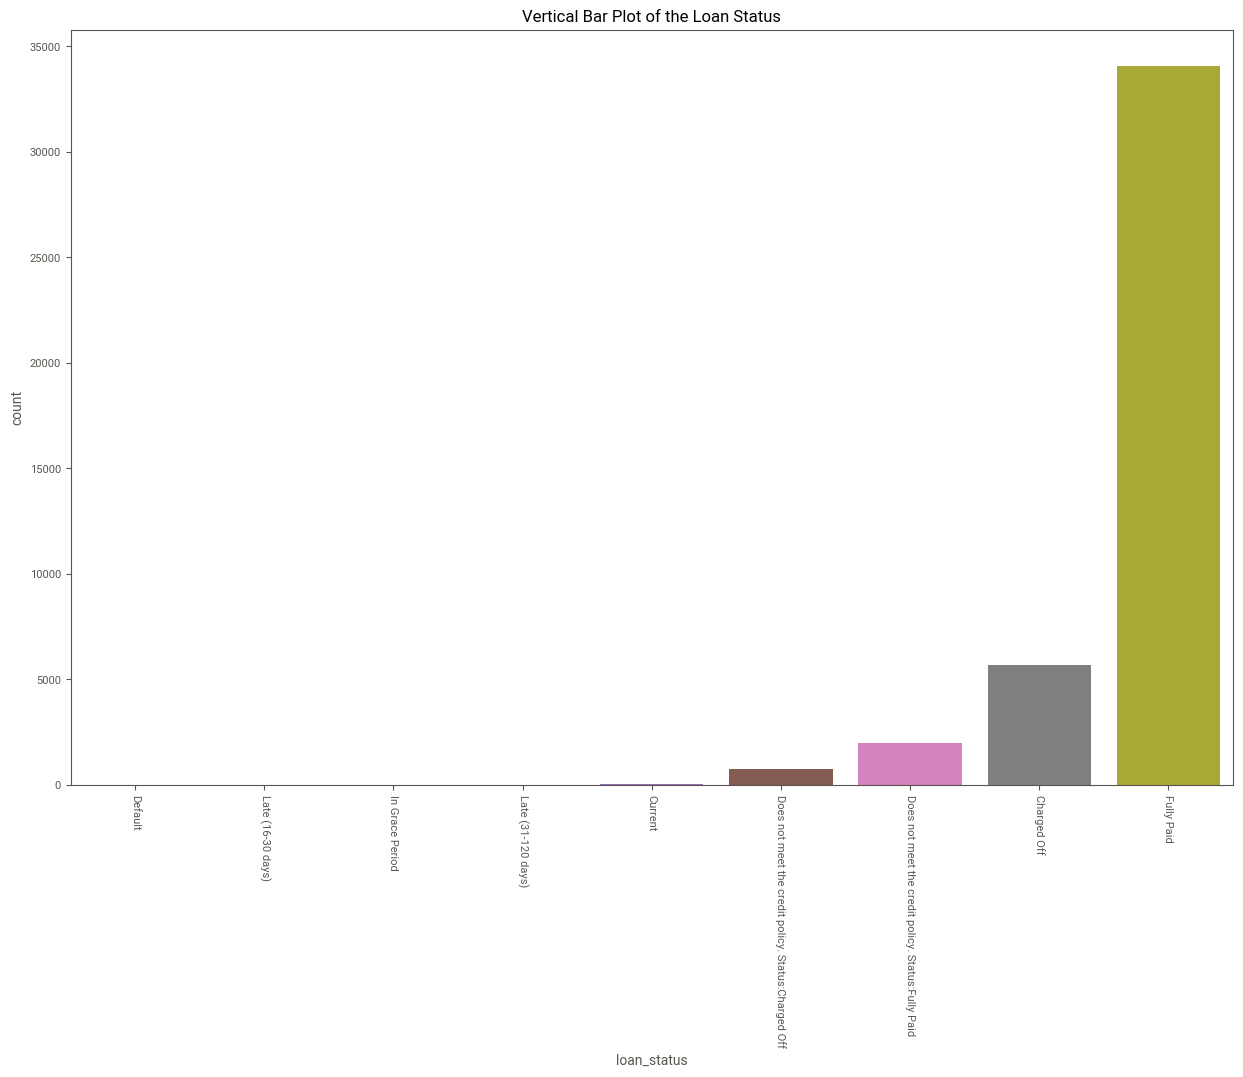

In [426]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=filtered_data,
              order = filtered_data["loan_status"].value_counts(ascending=True).index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()

In [427]:
df = filtered_data[filtered_data['loan_status'].isin(["Fully Paid","Charged Off"])]

In [428]:
df1 = filtered_data[filtered_data['loan_status'].isin(["Fully Paid","Charged Off","Current", "Default"])]

In [429]:
df.to_csv("loan_data.csv", index=False)

<ipython-input-430-763c9ba3cf3a>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


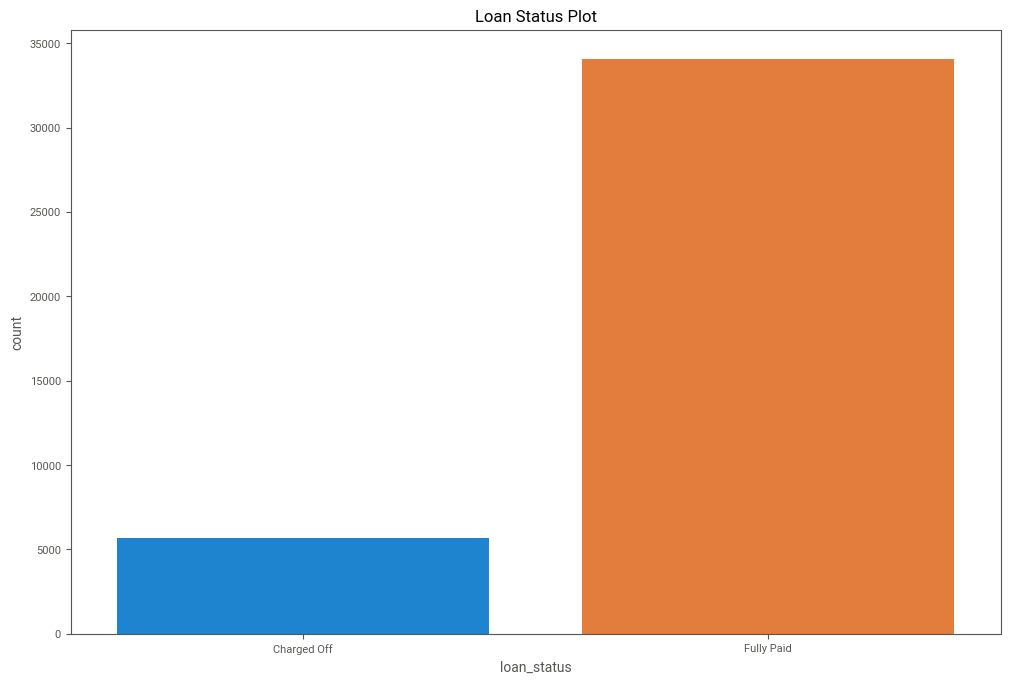

In [430]:
plt.figure(figsize=(12,8))
sns.countplot(x="loan_status", data=df,order=df["loan_status"].value_counts(ascending=True).index)
plt.title("Loan Status Plot")
plt.show()

In [431]:
df["loan_status"].value_counts()

Fully Paid     34085
Charged Off     5662
Name: loan_status, dtype: int64

In [432]:
df1["loan_status"].value_counts()

Fully Paid     34085
Charged Off     5662
Current           19
Default            1
Name: loan_status, dtype: int64

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ModuleNotFoundError: No module named 'matplotlib.backends.backend_svg'

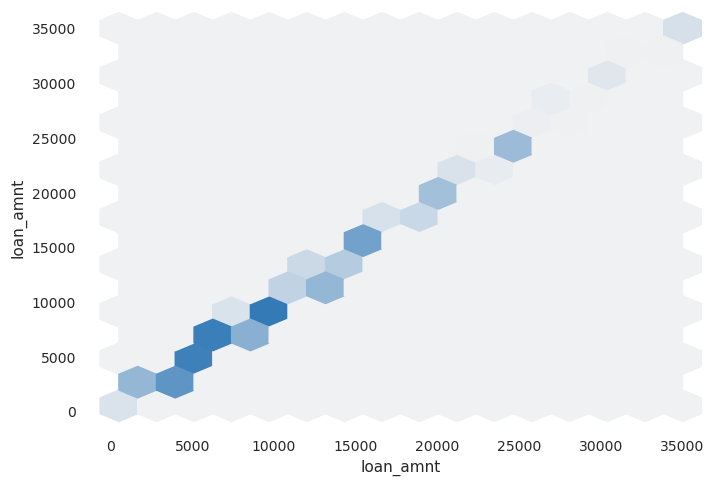

In [433]:
import pandas_profiling
profile  = pandas_profiling.ProfileReport(filtered_data, title="Pandas Profiling Report")
profile.to_file("loan_default_profiling.html")

In [ ]:
import sweetviz
my_report  = sweetviz.analyze(filtered_data)
my_report.show_html('FinalReport.html')

In [434]:
df.describe(include =np.object)

,term,int_rate,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
count,39747,39747,38671,39747,39747,39747,39747,39747,39736,39747,39747,39697,39747,39745,39747
unique,2,371,11,5,3,2,1,14,19632,50,526,1089,1,113,1
top,36 months,10.99%,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,Debt Consolidation,CA,Nov-1998,0%,f,Dec-2016,INDIVIDUAL
freq,29096,958,8888,18897,16923,34085,39747,18651,2187,7101,369,980,39747,10638,39747


In [435]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39747.000000,39747.000000,3.974700e+04,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39691.0,39747.0,39747.0,39691.0,39747.0,39050.000000,39708.0
mean,11225.755403,324.652461,6.898086e+04,13.315923,0.146502,0.869022,9.292827,0.055174,13388.582836,22.085868,0.0,1.0,0.0,0.0,0.0,0.043303,0.0
std,7460.917599,208.889015,6.378726e+04,6.678206,0.491817,1.070176,4.400069,0.237716,15899.681549,11.400633,0.0,0.0,0.0,0.0,0.0,0.204421,0.0
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,167.080000,4.050000e+04,8.180000,0.000000,0.000000,6.000000,0.000000,3701.500000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,280.390000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8855.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,430.780000,8.231400e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17062.500000,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [436]:
orig_columns=df.columns
drop_columns=[]
for col in orig_columns:
    col_series=df[col].dropna().unique()
    if len(col_series) ==1:
        drop_columns.append(col)
df=df.drop(drop_columns, axis=1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [437]:
df.shape

(39747, 23)

In [438]:
null_count=df.isnull().sum()

In [439]:
null_count

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1076
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [440]:
df=df.drop("pub_rec_bankruptcies" , axis=1)
df=df.dropna(axis=0)

In [441]:
null_count=df.isnull().sum()
null_count

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

In [442]:
print(df.dtypes.value_counts())

object     12
float64    10
dtype: int64


In [443]:
object_columns_df = df.select_dtypes(include=["object"])
object_columns_df.columns

Index(['term', 'int_rate', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_credit_pull_d'],
      dtype='object')

In [444]:
object_columns_df.iloc[0]

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Dec-2016
Name: 0, dtype: object

In [445]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state']
for col in columns:
    print(df[col].value_counts())
    print(" ")

 36 months    28234
 60 months    10378
Name: term, dtype: int64
 
10+ years    8886
< 1 year     4573
2 years      4387
3 years      4090
4 years      3429
5 years      3279
1 year       3236
6 years      2224
7 years      1770
8 years      1480
9 years      1258
Name: emp_length, dtype: int64
 
RENT        18451
MORTGAGE    17226
OWN          2836
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
 
Not Verified       16466
Verified           12354
Source Verified     9792
Name: verification_status, dtype: int64
 
CA    6903
NY    3707
FL    2776
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1377
GA    1357
MA    1312
OH    1190
MD    1033
AZ     831
WA     806
CO     768
NC     760
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     444
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
MT      79
WY      79
AK      77
SD     

In [446]:
print(df["purpose"].value_counts())
print(" ")
print(df["title"].value_counts())

debt_consolidation    18239
credit_card            4999
other                  3821
home_improvement       2883
major_purchase         2108
small_business         1779
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64
 
Debt Consolidation                        2145
Debt Consolidation Loan                   1691
Personal Loan                              643
Consolidation                              508
debt consolidation                         488
                                          ... 
Home Improvment/Pay of Debt                  1
2004 GMC                                     1
Rudy-loan                                    1
Improving my home                            1
Planning to pay off in less than 3 yrs       1
Name: title, Length: 19133, dtype: int64


In [447]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}

In [448]:
df = df.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)


In [449]:
df["int_rate"]=df["int_rate"].str.rstrip("%").astype("float")

In [450]:
# df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%","")))
# df["int_rate"] = df["int_rate"].apply(lambda x: float(x.split("%")[0]))

In [451]:
df["revol_util"] = df["revol_util"].str.rstrip("%").astype("float")
df = df.replace(mapping_dict)

In [452]:
df["term"] = df["term"].apply(lambda x: float(x.replace(" months","")))


In [453]:
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36.0,15.96,84.33,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36.0,13.49,339.31,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36.0,7.90,156.46,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,8.07,78.42,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0
39782,8500.0,36.0,10.28,275.38,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0
39783,5000.0,36.0,8.07,156.84,0,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0
39784,5000.0,36.0,7.43,155.38,0,MORTGAGE,200000.0,Not Verified,Fully Paid,other,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0


In [454]:
df_final=df.copy(deep=True)

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38612 entries, 0 to 39785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38612 non-null  float64
 1   term                 38612 non-null  float64
 2   int_rate             38612 non-null  float64
 3   installment          38612 non-null  float64
 4   emp_length           38612 non-null  int64  
 5   home_ownership       38612 non-null  object 
 6   annual_inc           38612 non-null  float64
 7   verification_status  38612 non-null  object 
 8   loan_status          38612 non-null  object 
 9   purpose              38612 non-null  object 
 10  dti                  38612 non-null  float64
 11  delinq_2yrs          38612 non-null  float64
 12  inq_last_6mths       38612 non-null  float64
 13  open_acc             38612 non-null  float64
 14  pub_rec              38612 non-null  float64
 15  revol_bal            38612 non-null 

In [456]:
categorical_columns = ["home_ownership", "verification_status", "purpose"]
dummy_df = pd.get_dummies(df[categorical_columns])

In [457]:
dummy_df

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39782,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39783,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39784,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [458]:
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(categorical_columns, axis=1)

In [459]:
df.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36.0,10.65,162.87,10,24000.0,Fully Paid,27.65,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60.0,15.27,59.83,0,30000.0,Charged Off,1.00,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36.0,15.96,84.33,10,12252.0,Fully Paid,8.72,0.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36.0,13.49,339.31,10,49200.0,Fully Paid,20.00,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,36.0,7.90,156.46,3,36000.0,Fully Paid,11.20,0.0,3.0,...,0,0,0,0,0,0,0,0,0,1


<ipython-input-460-b5fcfbfaba54>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


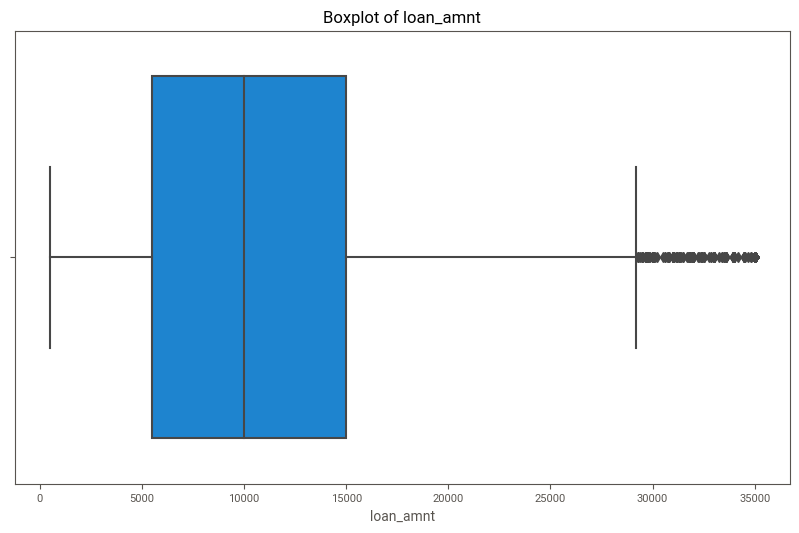

In [460]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_amnt',data=df_final)
plt.title("Boxplot of loan_amnt")
plt.show()

In [461]:
Q1=df["loan_amnt"].quantile(0.25)
Q3=df["loan_amnt"].quantile(0.75)
IQR=Q3-Q1
data_df=df[((df["loan_amnt"] < ( Q1 -1.5 *IQR)) |(df['loan_amnt'] > (Q3 + 1.5 * IQR)))]

In [462]:
data_df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
31,31825.0,36.0,7.90,995.82,5,75000.0,Fully Paid,14.03,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
80,35000.0,60.0,17.27,551.84,3,150000.0,Fully Paid,7.51,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
128,35000.0,36.0,8.90,1111.37,6,125000.0,Fully Paid,22.71,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
185,35000.0,36.0,10.65,1140.07,2,168000.0,Fully Paid,3.17,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
209,29500.0,60.0,20.30,786.51,6,83000.0,Fully Paid,20.93,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,32000.0,60.0,20.85,863.01,5,62400.0,Fully Paid,13.04,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19875,32000.0,60.0,19.74,843.19,8,93500.0,Fully Paid,16.36,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19889,30000.0,60.0,16.40,735.94,6,110000.0,Fully Paid,9.03,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19902,30000.0,60.0,17.88,759.85,10,360000.0,Fully Paid,11.35,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
Q1=df_final["loan_amnt"].quantile(0.25)
Q3=df_final["loan_amnt"].quantile(0.75)
IQR=Q3-Q1
data=df_final[((df_final["loan_amnt"] < ( Q1 -1.5 *IQR)) |(df_final['loan_amnt'] > (Q3 + 1.5 * IQR)))]

In [464]:
data

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
31,31825.0,36.0,7.90,995.82,5,MORTGAGE,75000.0,Verified,Fully Paid,debt_consolidation,14.03,0.0,0.0,12.0,0.0,23151.0,27.4,26.0
80,35000.0,60.0,17.27,551.84,3,MORTGAGE,150000.0,Verified,Fully Paid,home_improvement,7.51,0.0,1.0,11.0,0.0,7334.0,53.3,31.0
128,35000.0,36.0,8.90,1111.37,6,MORTGAGE,125000.0,Verified,Fully Paid,debt_consolidation,22.71,0.0,0.0,8.0,0.0,9051.0,34.8,32.0
185,35000.0,36.0,10.65,1140.07,2,MORTGAGE,168000.0,Verified,Fully Paid,debt_consolidation,3.17,1.0,1.0,16.0,0.0,1099.0,1.4,22.0
209,29500.0,60.0,20.30,786.51,6,MORTGAGE,83000.0,Source Verified,Fully Paid,debt_consolidation,20.93,0.0,0.0,12.0,0.0,22087.0,89.8,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,32000.0,60.0,20.85,863.01,5,RENT,62400.0,Verified,Fully Paid,debt_consolidation,13.04,0.0,0.0,4.0,0.0,27618.0,97.2,11.0
19875,32000.0,60.0,19.74,843.19,8,RENT,93500.0,Verified,Fully Paid,debt_consolidation,16.36,0.0,0.0,10.0,1.0,33036.0,73.9,12.0
19889,30000.0,60.0,16.40,735.94,6,MORTGAGE,110000.0,Not Verified,Fully Paid,debt_consolidation,9.03,0.0,0.0,10.0,0.0,31675.0,55.2,37.0
19902,30000.0,60.0,17.88,759.85,10,MORTGAGE,360000.0,Source Verified,Fully Paid,debt_consolidation,11.35,0.0,3.0,17.0,0.0,51087.0,89.3,48.0


•	Questions:
1.	Distribution of Numerical Attributes (distplot and histogram)
a)	Distribution of Loan Value /Loan Amount
What is distribution of Loan Amount
b)	Interest Rate
c)	Instalment
d)	Annual Income
e)	Revol Balance
f)	Revol Utilization
2.	Unique and counts of Categorical attributes (Countplot,pie-chart)
a)	Term
b)	Employment Length
c)	Loan Status
d)	Home Ownership
e)	Verification Status
f)	Purpose/Title
3.	Relation between two numerical attributes (scatter Plot
a)	6C2
a)	What is the instalment with interest rate?
b)	How Interest rate is applied wrt Annual Income
c)	What are the instalments wrt to interest rates
d)	What is the loan amount wrt to interest rate
e)	What is the Loan amount sanctioned wrt Annual income
4.	Correlation Matrix is between numerical values
Heat Map 
5.	Relation between numerical and categorical values


In [465]:
#df_final["loan_amnt"].value_counts()/

(df_final.loan_amnt.value_counts()*100)/len(df_final)

10000.0    7.160986
12000.0    5.954108
5000.0     5.112400
15000.0    4.819745
6000.0     4.796436
             ...   
23475.0    0.002590
21700.0    0.002590
14225.0    0.002590
28250.0    0.002590
1625.0     0.002590
Name: loan_amnt, Length: 878, dtype: float64

<ipython-input-466-edc5577d101b>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Text(0.5, 1.0, 'Distribution of Loan Amount')

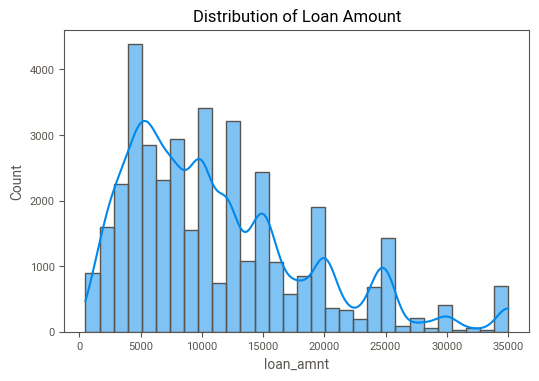

In [466]:

import matplotlib.pyplot as plt

sns.histplot(data=df,x="loan_amnt",bins=30, kde=True)
plt.show()
plt.title("Distribution of Loan Amount")


Insights:
    Maximun % of Loan amount is of  Value 10000 which is 7% 
    
Top 5 Value of Loan AMount distribution %   
10000.0    7.160986
12000.0    5.954108
5000.0     5.112400
15000.0    4.819745
6000.0     4.796436

In [467]:
(df_final.int_rate.value_counts()*100)/len(df_final)

10.99    2.418937
13.49    2.115923
11.49    2.071895
7.51     1.957941
7.88     1.815498
           ...   
16.33    0.002590
20.52    0.002590
10.64    0.002590
16.20    0.002590
14.67    0.002590
Name: int_rate, Length: 371, dtype: float64

<ipython-input-468-de6ca9fb5700>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Text(0.5, 1.0, 'Distribution of Rate of INterest')

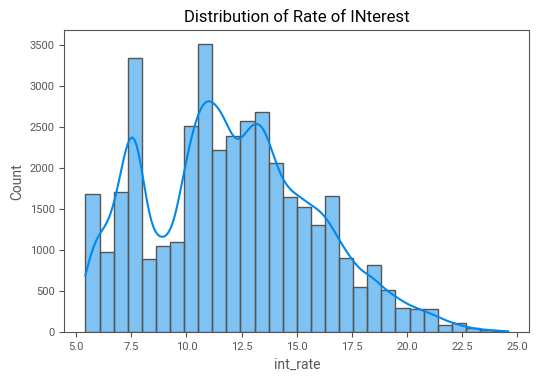

In [468]:
sns.histplot(data=df,x="int_rate",bins=30, kde=True)
plt.show()
plt.title("Distribution of Rate of INterest")

Insights:

    Maximun Loan was disbursed at 10% of Rate of intrest 2.41%..
    
Top 5 Value of Rate of INterest
10.99    2.418937 %
13.49    2.115923 %
11.49    2.071895 %
7.51     1.957941 %
7.88     1.815498 %

In [469]:
df_final["annual_inc"].value_counts()

60000.0     1474
50000.0     1035
40000.0      858
45000.0      812
75000.0      806
            ... 
54503.0        1
163500.0       1
32758.0        1
74263.0        1
140900.0       1
Name: annual_inc, Length: 5098, dtype: int64

<ipython-input-470-57106e49f14e>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Text(0.5, 1.0, 'Distribution of Annual income of Customers')

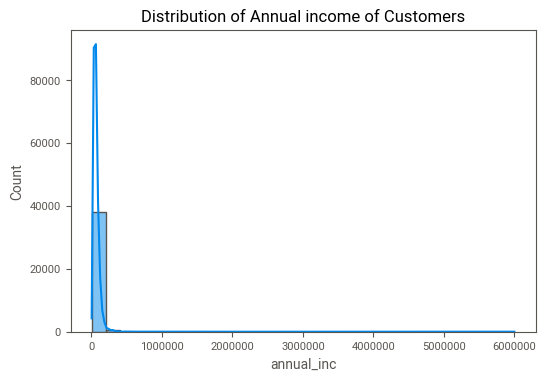

In [470]:
sns.histplot(data=df,x="annual_inc",bins=30, kde=True)
plt.show()
plt.title("Distribution of Annual income of Customers")

Insights:
    
   3.8 %  of Customer are with Annual income of 60000  who has taken the loan

In [471]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


<ipython-input-472-6b071e146714>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Text(0.5, 1.0, 'Distribution of Revolving Balance')

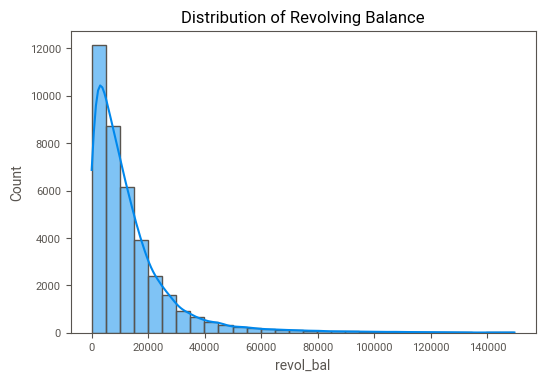

In [472]:
sns.histplot(data=df,x="revol_bal",bins=30, kde=True)
plt.show()
plt.title("Distribution of Revolving Balance")

<ipython-input-473-6511546215f1>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Text(0.5, 1.0, 'Distribution of Revolving Utilization')

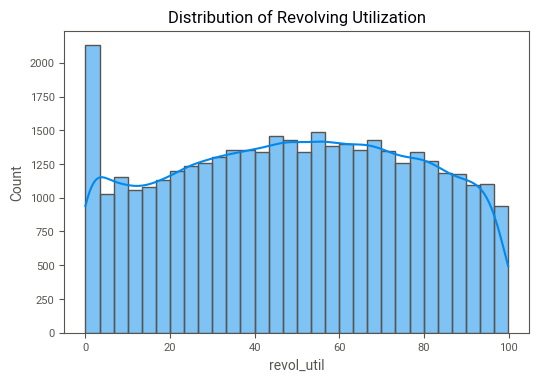

In [473]:
sns.histplot(data=df,x="revol_util",bins=30, kde=True)
plt.show()
plt.title("Distribution of Revolving Utilization")

# 2.	Unique and counts of Categorical attributes (Countplot,pie-chart)
a)	Term
b)	Employment Length
c)	Loan Status
d)	Home Ownership
e)	Verification Status
f)	Purpose/Title

In [474]:
df_final["term"].value_counts()*100/len(df_final)

36.0    73.122345
60.0    26.877655
Name: term, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-475-821c2e4752f5>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


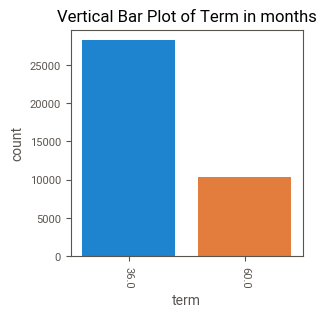

In [475]:
plt.figure(figsize=(3,3))
sns.countplot("term", data=df_final , order=df["term"] . value_counts(ascending=False). index)
plt.title("Vertical Bar Plot of Term in months")
plt.xticks(rotation=270)
plt.show()

In [476]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


In [477]:
df_final["emp_length"].value_counts()*100/len(df_final)

10    23.013571
0     11.843468
2     11.361753
3     10.592562
4      8.880659
5      8.492179
1      8.380814
6      5.759867
7      4.584067
8      3.833005
9      3.258054
Name: emp_length, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-478-3c31518106f7>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


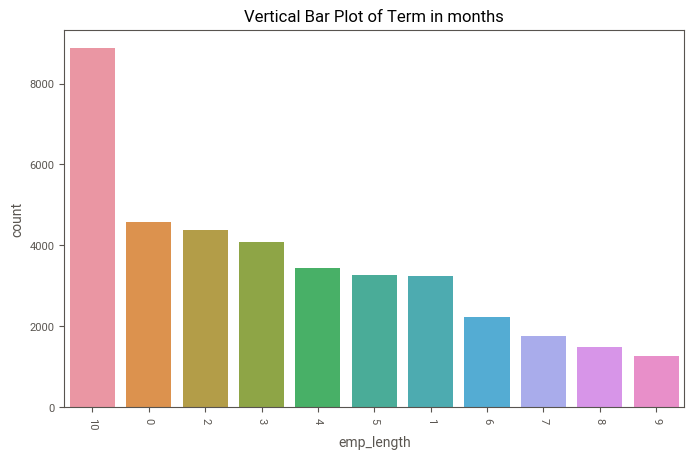

In [478]:
plt.figure(figsize=(8,5))
sns.countplot("emp_length", data=df_final , order=df["emp_length"] . value_counts(ascending=False). index)
plt.title("Vertical Bar Plot of Term in months")
plt.xticks(rotation=270)
plt.show()

Insights:
    
1. 23 % Customers with max Employee lenght takes the maximum loan 
2.Customers with employee lenghts of an year stands 2nd top 11.8%

Top 5 Employee lenght % taking loan

10    23.013571
0     11.843468
2     11.361753
3     10.592562
4      8.880659

In [479]:
df["loan_status"].value_counts()*100/len(df_final)

Fully Paid     85.975862
Charged Off    14.024138
Name: loan_status, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-480-ec38a3407696>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


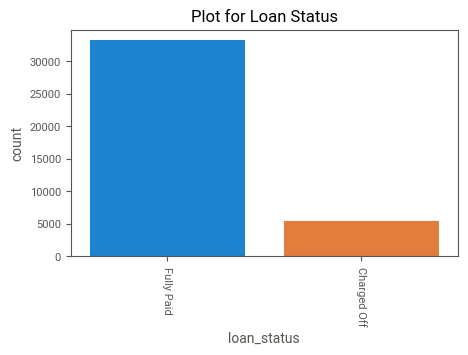

In [480]:
plt.figure(figsize=(5,3))
sns.countplot("loan_status", data=df_final , order=df["loan_status"] . value_counts(ascending=False). index)
plt.title("Plot for Loan Status")
plt.xticks(rotation=270)
plt.show()

In [481]:
#home_ownership	
df_final["home_ownership"].value_counts()*100/len(df_final)

RENT        47.785662
MORTGAGE    44.613074
OWN          7.344867
OTHER        0.248627
NONE         0.007770
Name: home_ownership, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-482-3e068988757b>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


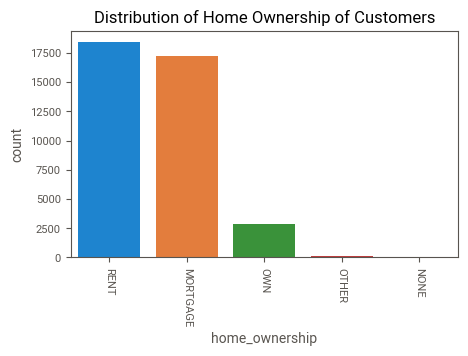

In [482]:
plt.figure(figsize=(5,3))
sns.countplot("home_ownership", data=df_final , order=df_final["home_ownership"] . value_counts(ascending=False). index)
plt.title("Distribution of Home Ownership of Customers")
plt.xticks(rotation=270)
plt.show()

In [483]:
#e)	Verification Status verification_status
#f)	Purpose/Title
df_final["verification_status"].value_counts()*100/len(df_final)

Not Verified       42.644774
Verified           31.995235
Source Verified    25.359992
Name: verification_status, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-484-d2ea5eb63184>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


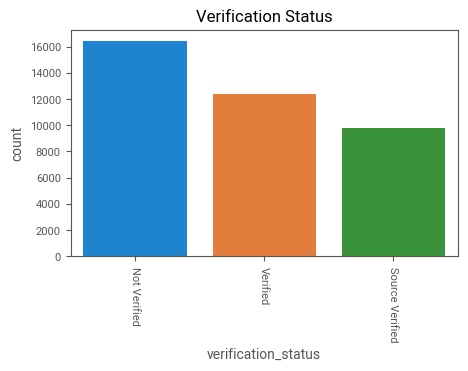

In [484]:
plt.figure(figsize=(5,3))
sns.countplot("verification_status", data=df_final , order=df_final["verification_status"] . value_counts(ascending=False). index)
plt.title("Verification Status")
plt.xticks(rotation=270)
plt.show()

Insights:
    
    Value of Customers Not verified is more stands at 42.6 %

In [485]:
df_final["purpose"].value_counts()*100/len(df_final)

debt_consolidation    47.236610
credit_card           12.946752
other                  9.895887
home_improvement       7.466591
major_purchase         5.459443
small_business         4.607376
car                    3.877033
wedding                2.418937
medical                1.730032
moving                 1.442557
house                  0.955661
vacation               0.909044
educational            0.808039
renewable_energy       0.246038
Name: purpose, dtype: float64

C:\Users\Nileema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-486-cf75fc285cd6>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


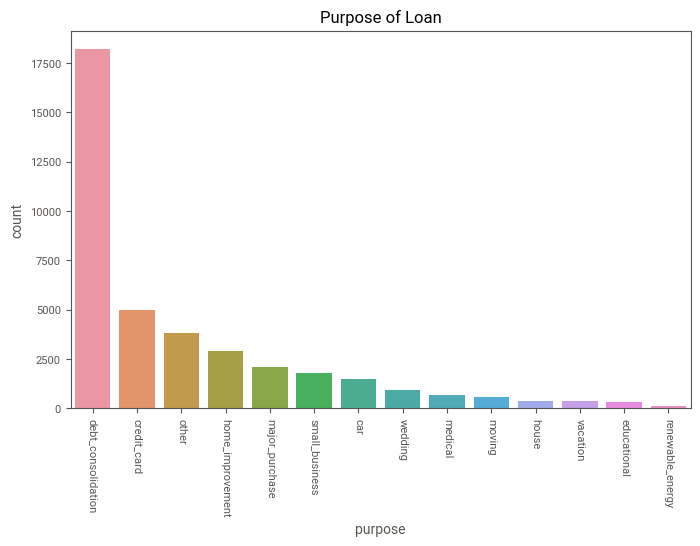

In [486]:
plt.figure(figsize=(8,5))
sns.countplot("purpose", data=df_final , order=df_final["purpose"] . value_counts(ascending=False). index)
plt.title("Purpose of Loan")
plt.xticks(rotation=270)
plt.show()

#3.	Relation between two numerical attributes (scatter Plot
a)	6C2
a)	Distribution of Loan Value /Loan Amount
What is distribution of Loan Amount
b)	Interest Rate
c)	Instalment
d)	Annual Income
e)	Revol Balance
f)	Revol Utilization


In [487]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


In [488]:
plt.figure(figsize=(16,12))
sns.barplot(data =loan_purpose, x='purpose', y='loan_amnt')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

NameError: name 'loan_purpose' is not defined

<Figure size 1600x1200 with 0 Axes>

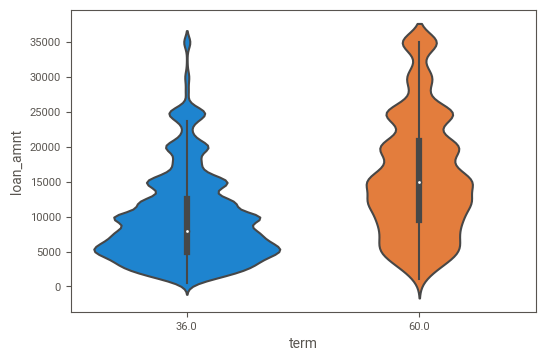

In [489]:
ax = sns.violinplot(x="term", y="loan_amnt", data=df_final)

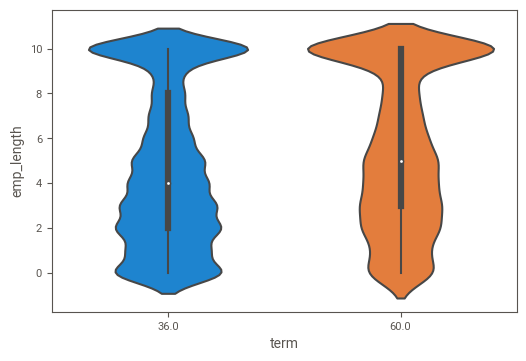

In [490]:
ax = sns.violinplot(x="term", y="emp_length", data=df_final)

<ipython-input-491-8047d29d162a>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


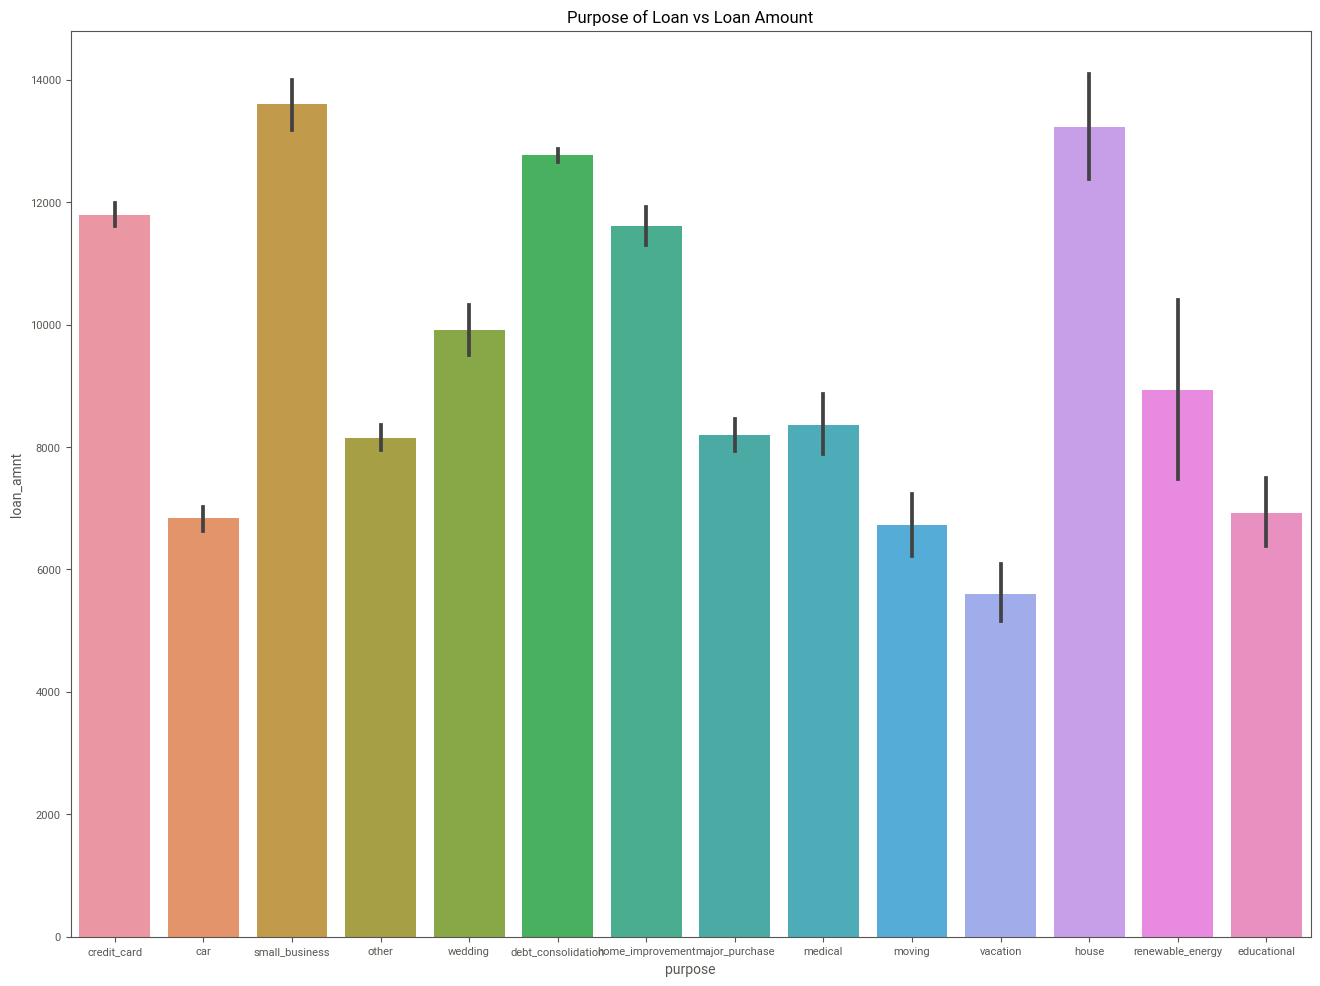

In [491]:
plt.figure(figsize=(16,12))
sns.barplot(data =df_final, x='purpose', y='loan_amnt')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [492]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


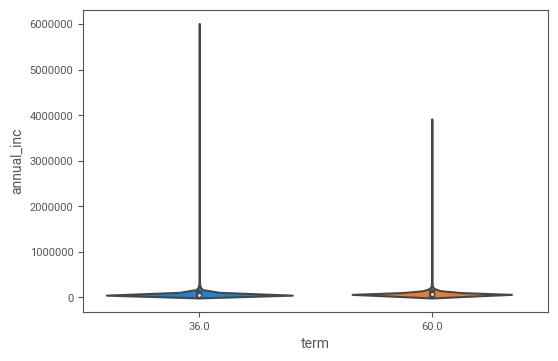

In [493]:
ax = sns.violinplot(x="term", y="annual_inc", data=df_final)

4.	Correlation Matrix is between numerical values

In [494]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


In [495]:
df_final.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [496]:
correlation_matrix=df_final[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length','revol_bal', 'revol_util','dti',]]

In [497]:
correlation_matrix

,loan_amnt,term,int_rate,installment,emp_length,revol_bal,revol_util,dti
0,5000.0,36.0,10.65,162.87,10,13648.0,83.7,27.65
1,2500.0,60.0,15.27,59.83,0,1687.0,9.4,1.00
2,2400.0,36.0,15.96,84.33,10,2956.0,98.5,8.72
3,10000.0,36.0,13.49,339.31,10,5598.0,21.0,20.00
5,5000.0,36.0,7.90,156.46,3,7963.0,28.3,11.20
...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,8.07,78.42,4,7274.0,13.1,11.33
39782,8500.0,36.0,10.28,275.38,3,8847.0,26.9,6.40
39783,5000.0,36.0,8.07,156.84,0,9698.0,19.4,2.30
39784,5000.0,36.0,7.43,155.38,0,85607.0,0.7,3.72


Correlation matrix is : 
                            loan_amnt  installment  annual_inc       dti  \
loan_amnt                    1.000000     0.930869    0.276122  0.065112   
installment                  0.930869     1.000000    0.278339  0.054948   
annual_inc                   0.276122     0.278339    1.000000 -0.116559   
dti                          0.065112     0.054948   -0.116559  1.000000   
delinq_2yrs                 -0.032767    -0.020096    0.022161 -0.036577   
inq_last_6mths              -0.030314    -0.010882    0.027764  0.014241   
open_acc                     0.176525     0.175349    0.168129  0.297951   
pub_rec                     -0.051636    -0.045850   -0.016348 -0.002854   
revol_bal                    0.254293     0.264837    0.283593  0.190727   
total_acc                    0.256931     0.233905    0.246163  0.241306   
collections_12_mths_ex_med        NaN          NaN         NaN       NaN   
policy_code                       NaN          NaN         NaN 

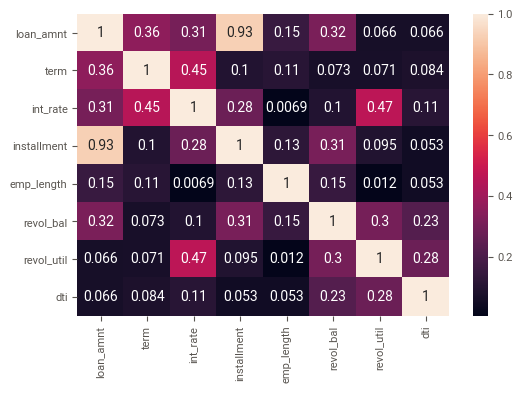

In [498]:
matrix=filtered_data.corr()
print("Correlation matrix is : ")
print(matrix)

ax = sns.heatmap(correlation_matrix.corr(), annot=True)

<ipython-input-513-63b2c5b502b3>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


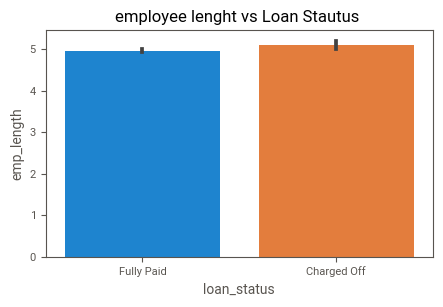

In [513]:
plt.figure(figsize=(5,3))

sns.barplot(y='emp_length', x='loan_status' , data=df_final )
plt.title('employee lenght vs Loan Stautus ')
plt.show()

<ipython-input-515-7a2aba395d2b>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


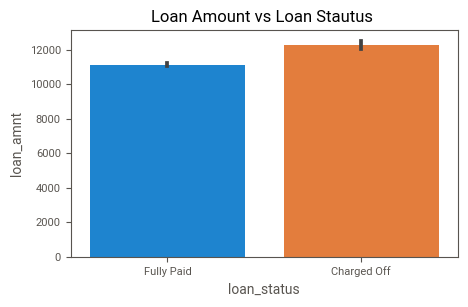

In [515]:
plt.figure(figsize=(5,3))

sns.barplot(y='loan_amnt', x='loan_status' , data=df_final )
plt.title('Loan Amount vs Loan Stautus ')
plt.show()

<ipython-input-517-836971b51852>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


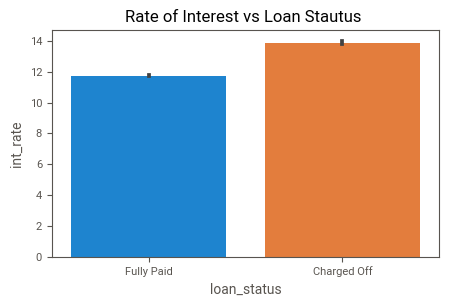

In [517]:
plt.figure(figsize=(5,3))

sns.barplot(y='int_rate', x='loan_status' , data=df_final )
plt.title('Rate of Interest vs Loan Stautus ')
plt.show()

<ipython-input-519-8f9bb5419e54>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


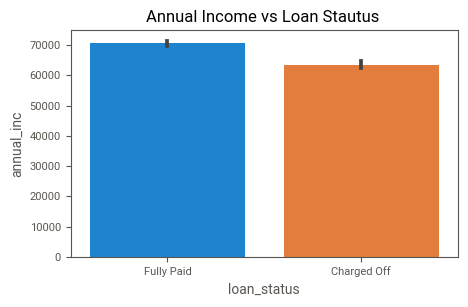

In [519]:
plt.figure(figsize=(5,3))

sns.barplot(y='annual_inc', x='loan_status' , data=df_final )
plt.title('Annual Income vs Loan Stautus ')
plt.show()

In [520]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


<ipython-input-524-dfb58f62b06d>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


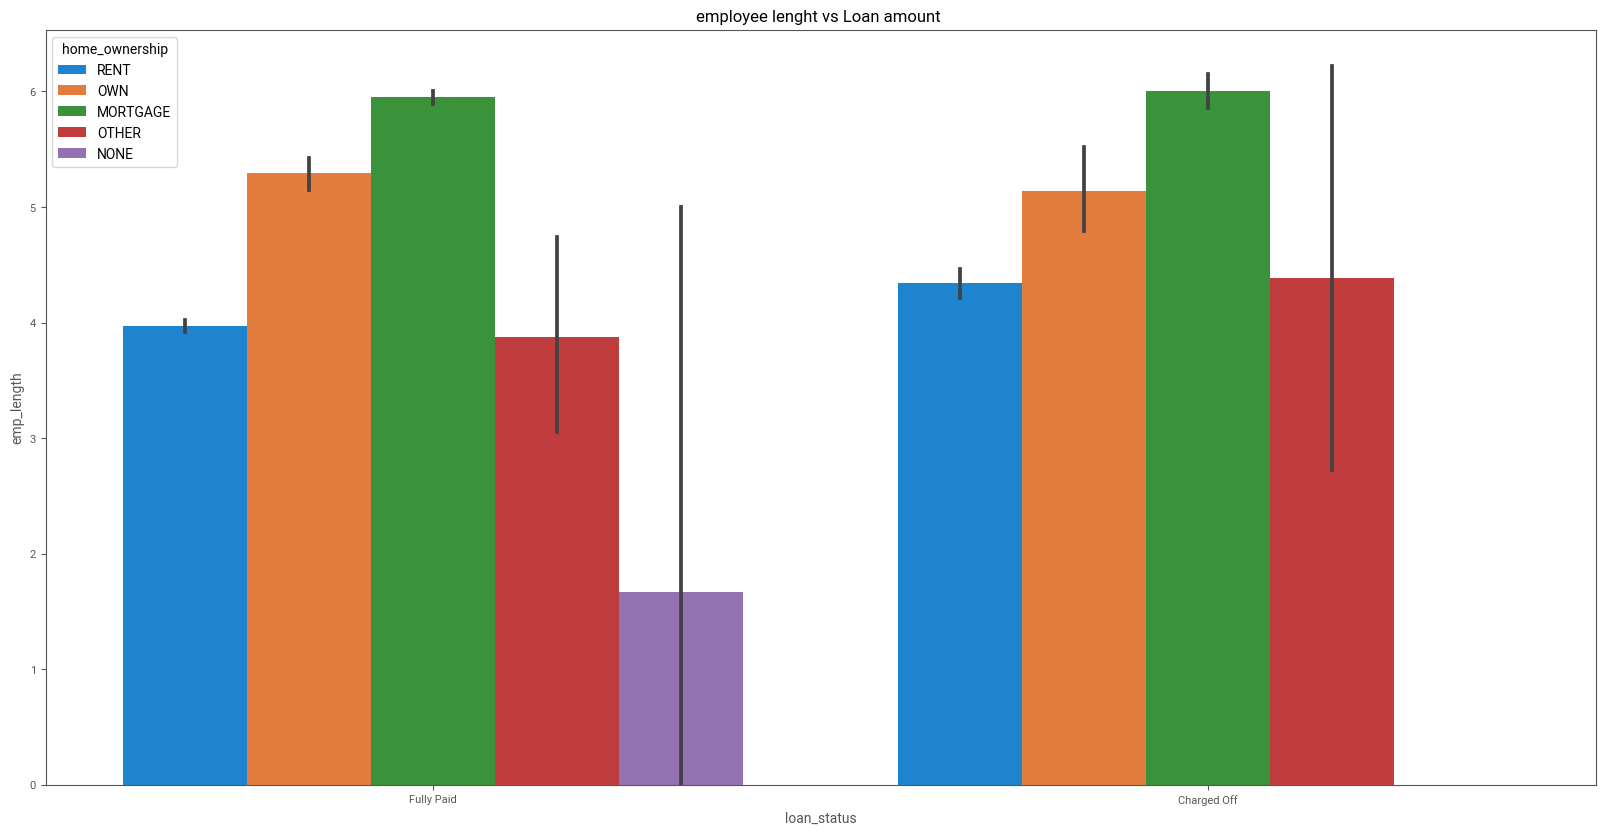

In [524]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='emp_length' , data=df_final , hue="home_ownership")
plt.title('employee lenght vs Loan amount ')
plt.show()

<ipython-input-528-b687c25ec21f>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


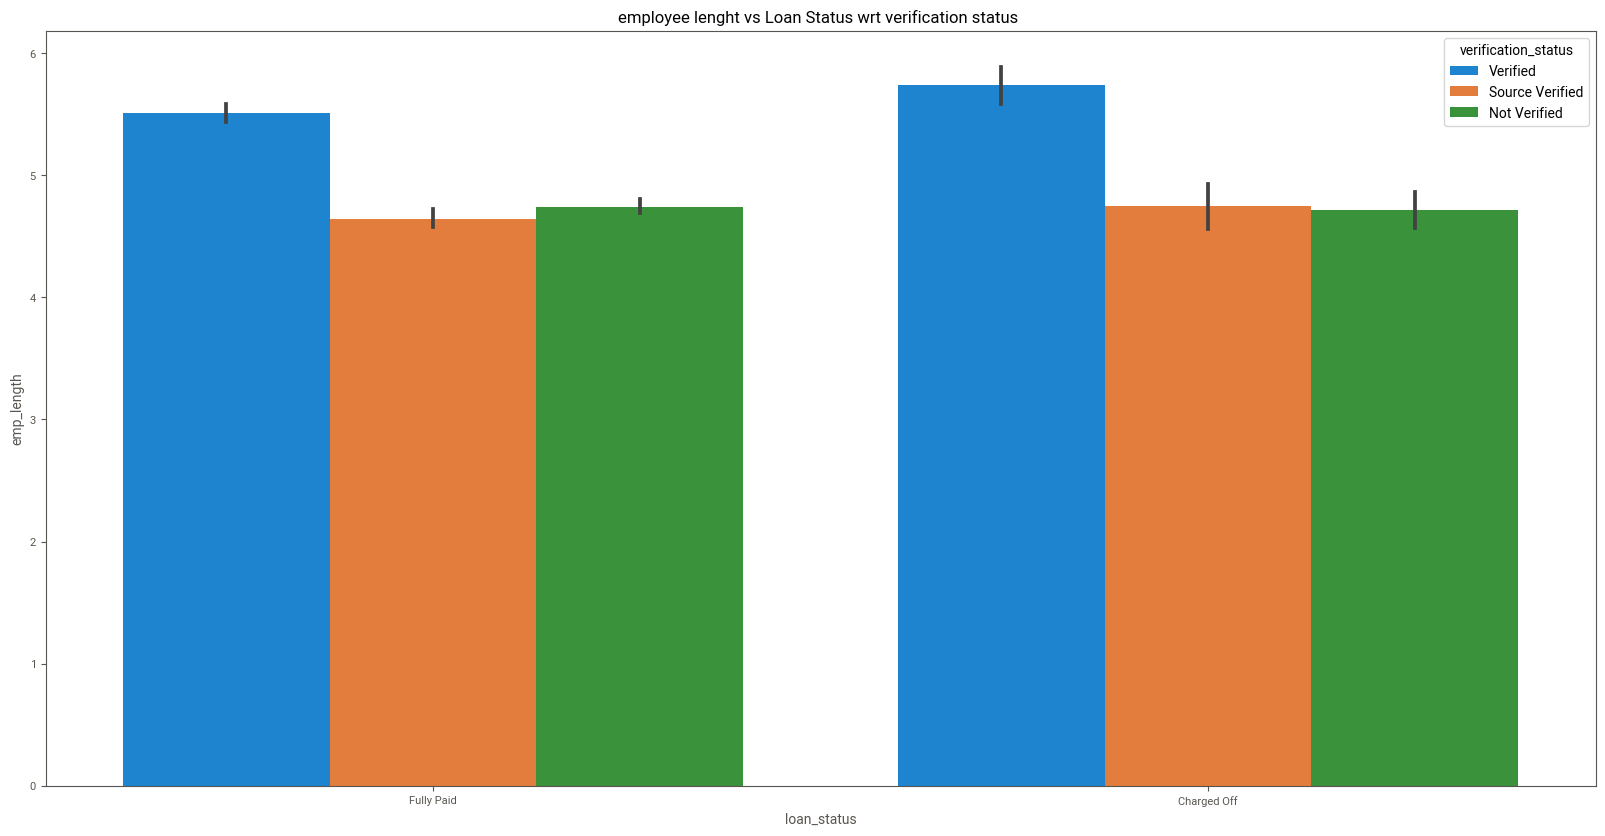

In [528]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='emp_length' , data=df_final , hue="verification_status")
plt.title('employee lenght vs Loan Status wrt verification status ')
plt.show()

<ipython-input-529-a8d2310e53c6>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


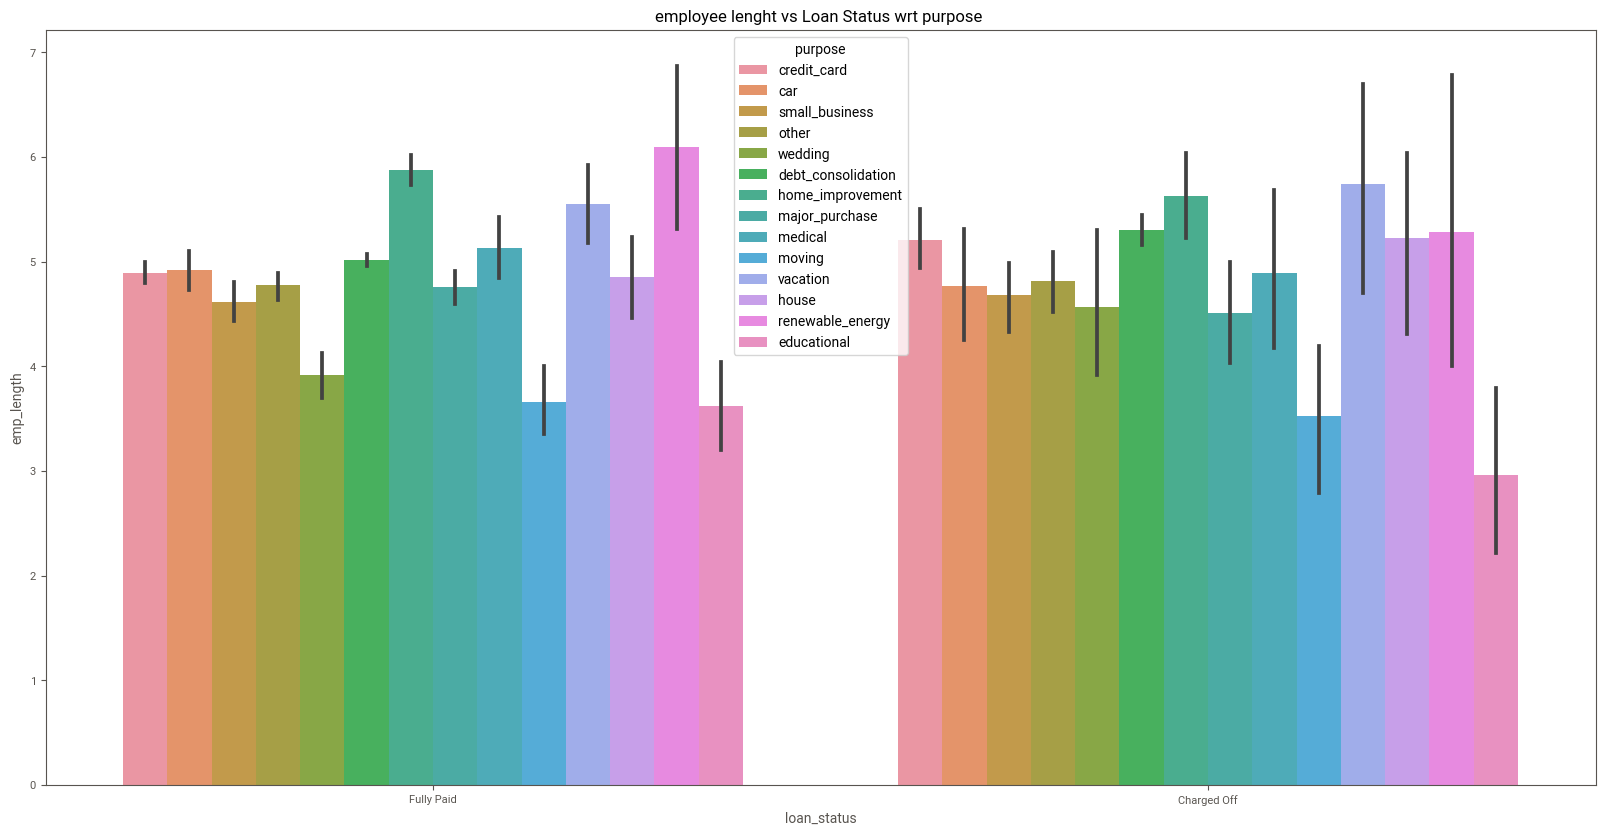

In [529]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='emp_length' , data=df_final , hue="purpose")
plt.title('employee lenght vs Loan Status wrt purpose ')
plt.show()

<ipython-input-527-cd7ce09d1b48>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


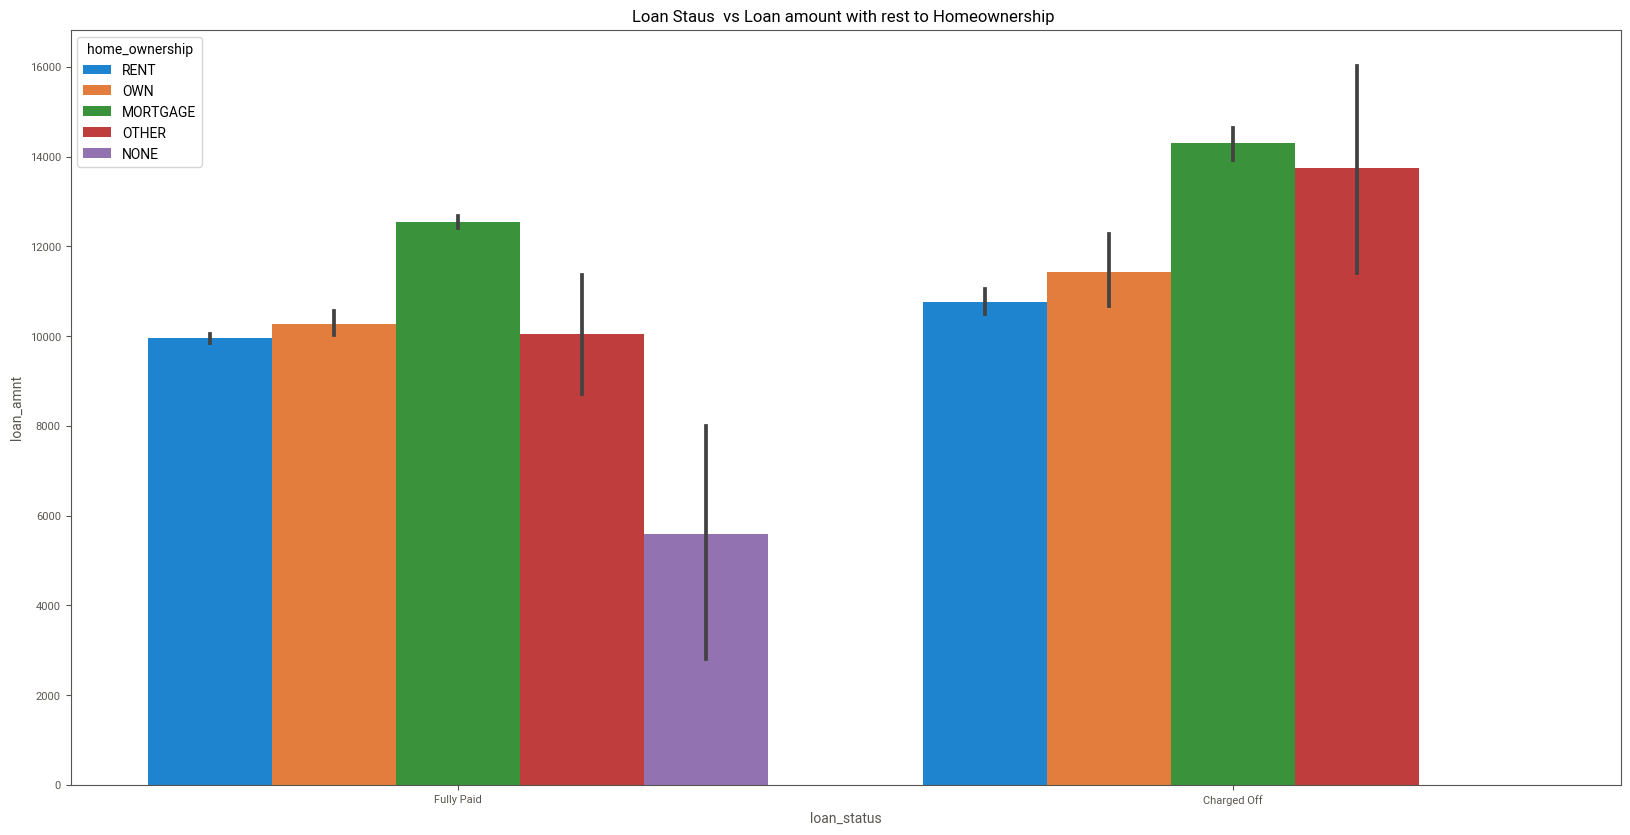

In [527]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='loan_amnt' , data=df_final , hue="home_ownership")
plt.title('Loan Staus  vs Loan amount with rest to Homeownership ')
plt.show()

<ipython-input-531-2ac1153d35af>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


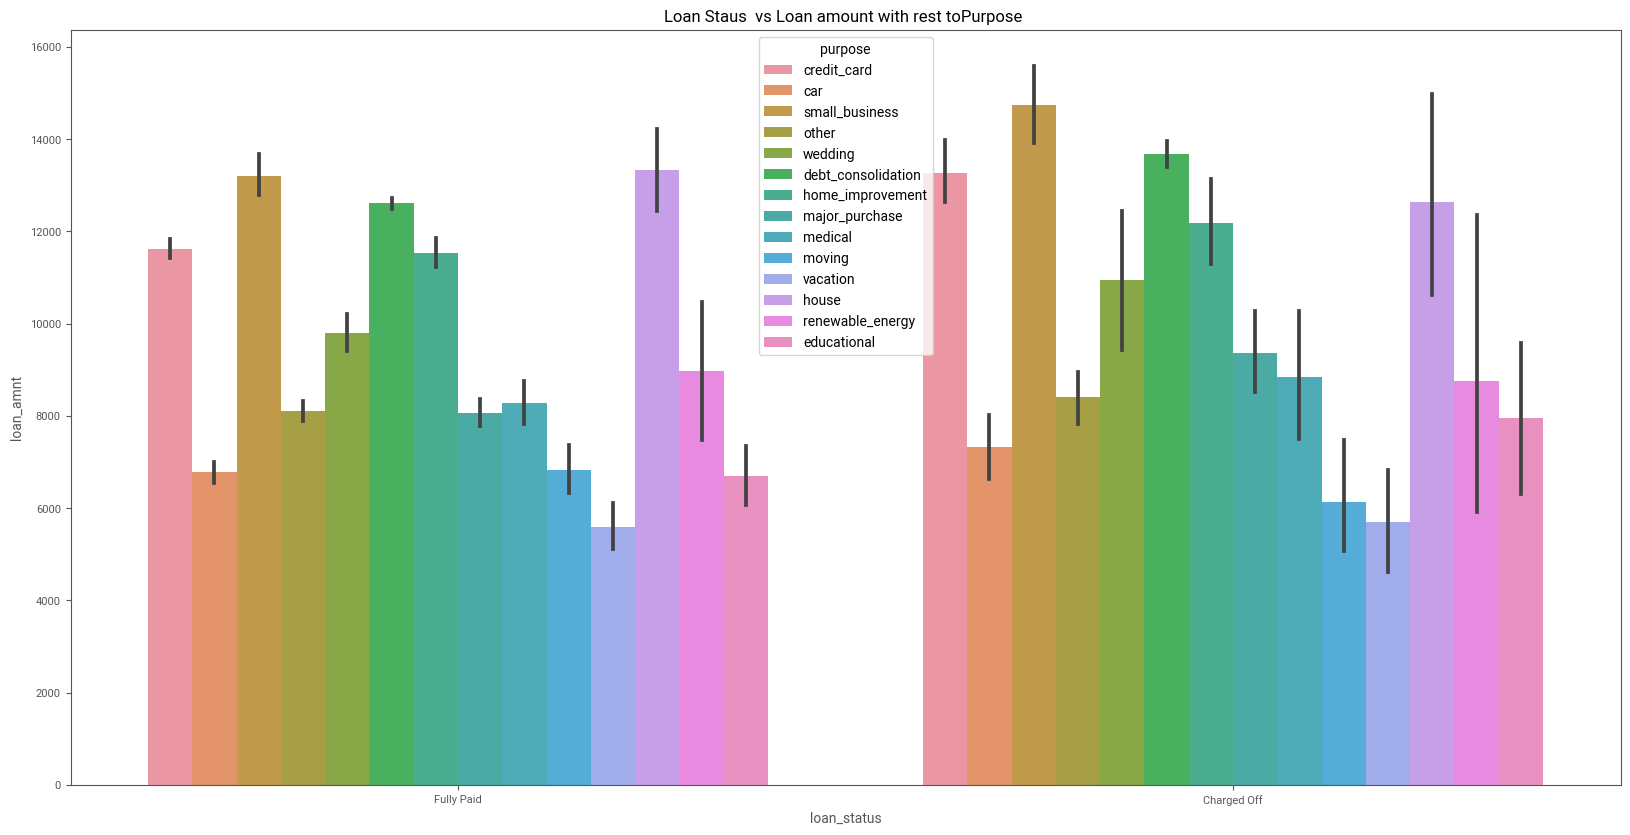

In [531]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='loan_amnt' , data=df_final , hue="purpose")
plt.title('Loan Staus  vs Loan amount with rest toPurpose ')
plt.show()

<ipython-input-535-c032492f8faa>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


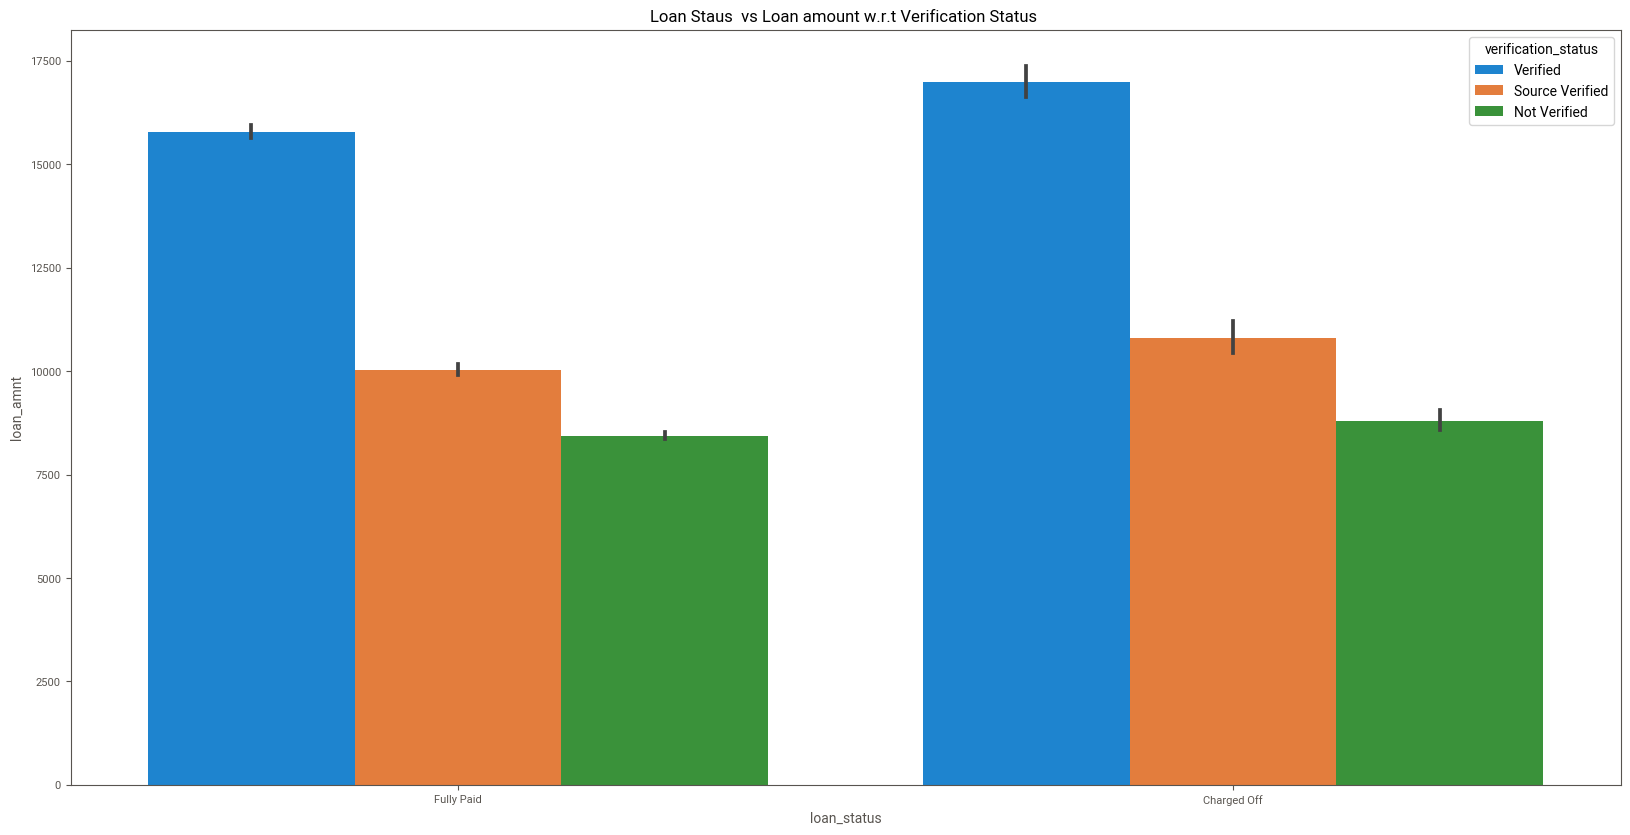

In [535]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='loan_amnt' , data=df_final , hue="verification_status")
plt.title('Loan Staus  vs Loan amount w.r.t Verification Status ')
plt.show()

<ipython-input-534-3ad744ceb01b>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


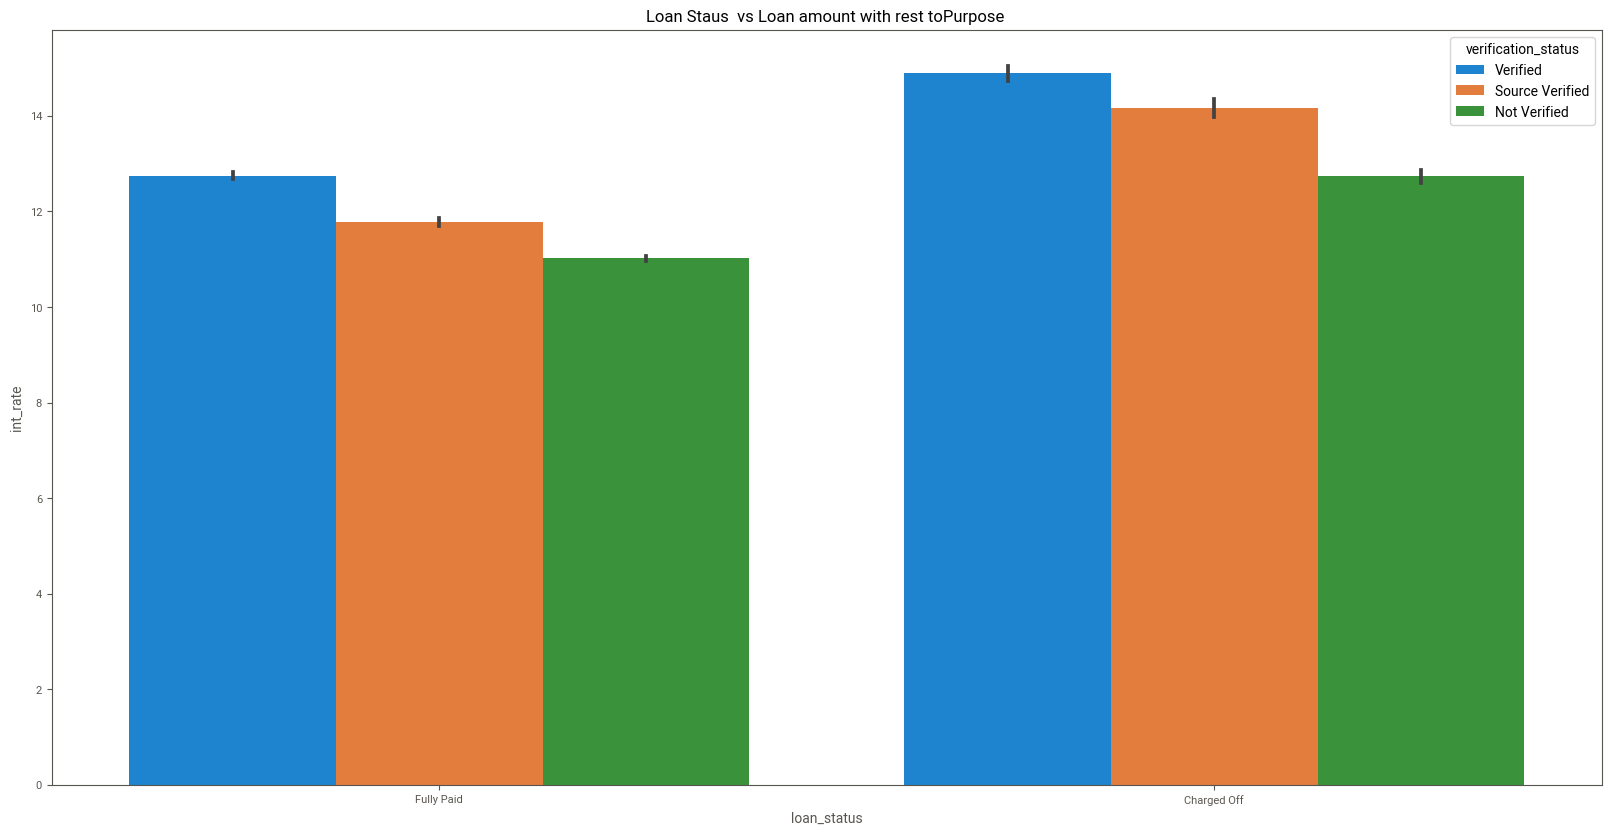

In [534]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='int_rate' , data=df_final , hue="verification_status")
plt.title('Loan Staus  vs Loan amount with rest toPurpose ')
plt.show()

<ipython-input-507-53a39ab67fdb>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


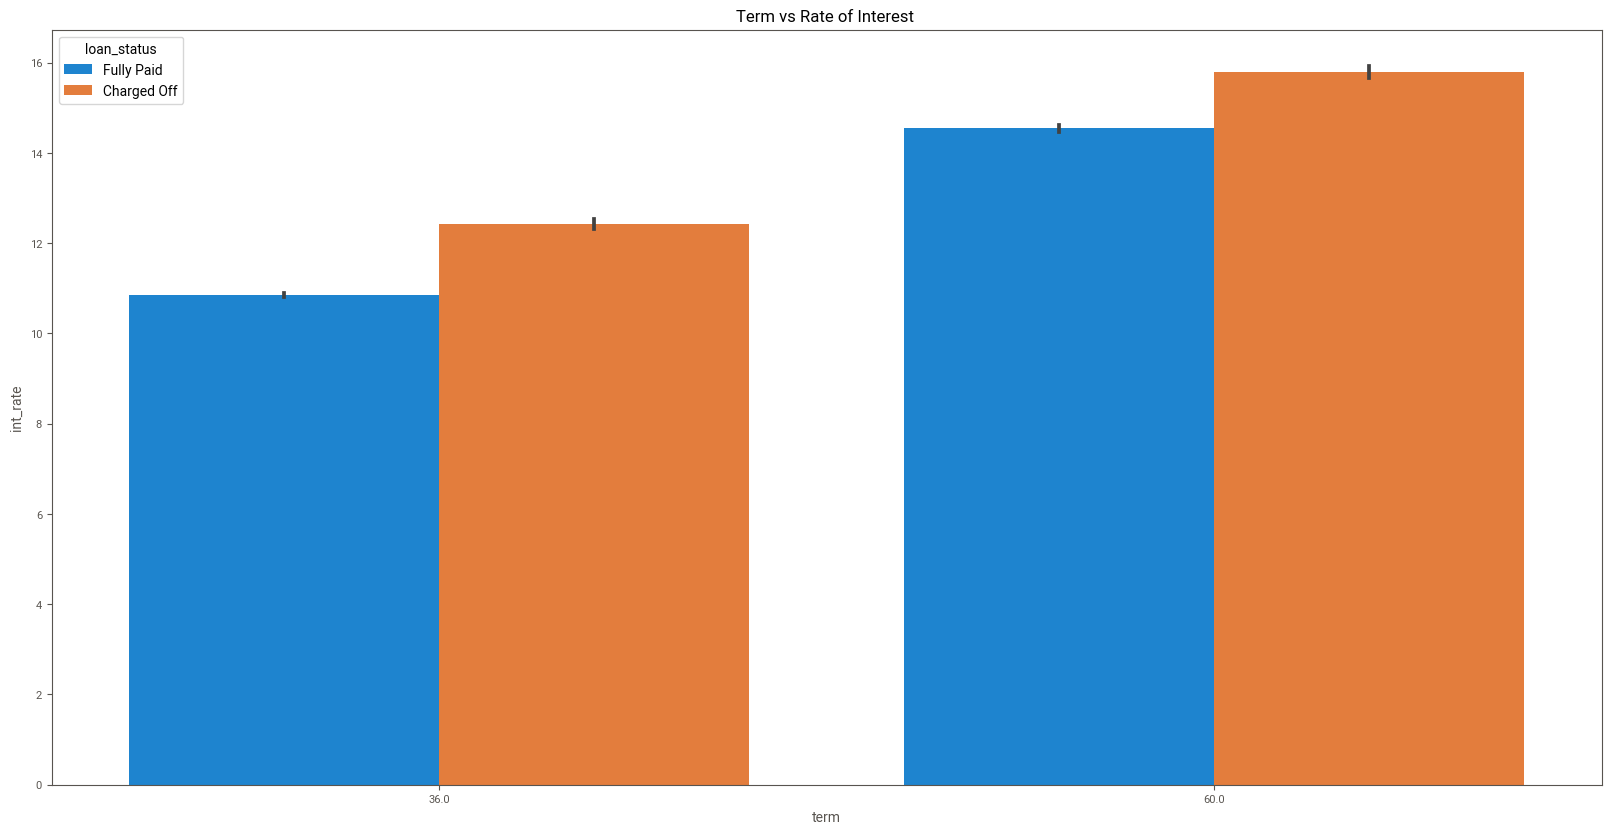

In [507]:
plt.figure(figsize=(20,10))

sns.barplot(x='term', y='int_rate' , data=df_final , hue="loan_status")
plt.title('Term vs Rate of Interest ')
plt.show()

<ipython-input-506-239d44b0365d>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


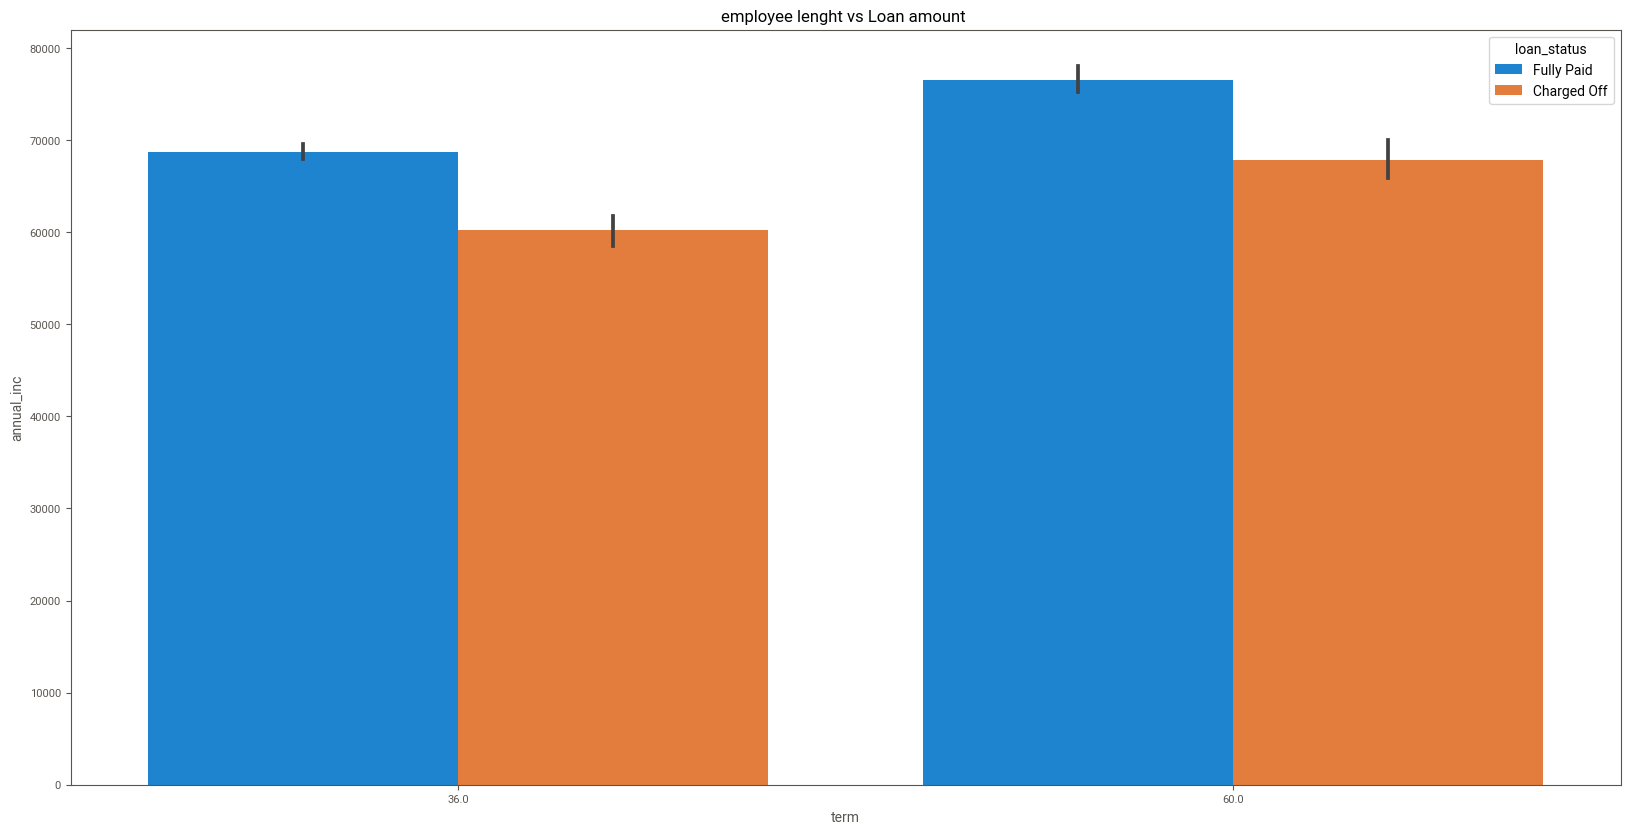

In [506]:
plt.figure(figsize=(20,10))

sns.barplot(x='term', y='annual_inc' , data=df_final , hue="loan_status")
plt.title('employee lenght vs Loan amount ')
plt.show()

In [508]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


<ipython-input-509-d444c63cf7a8>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


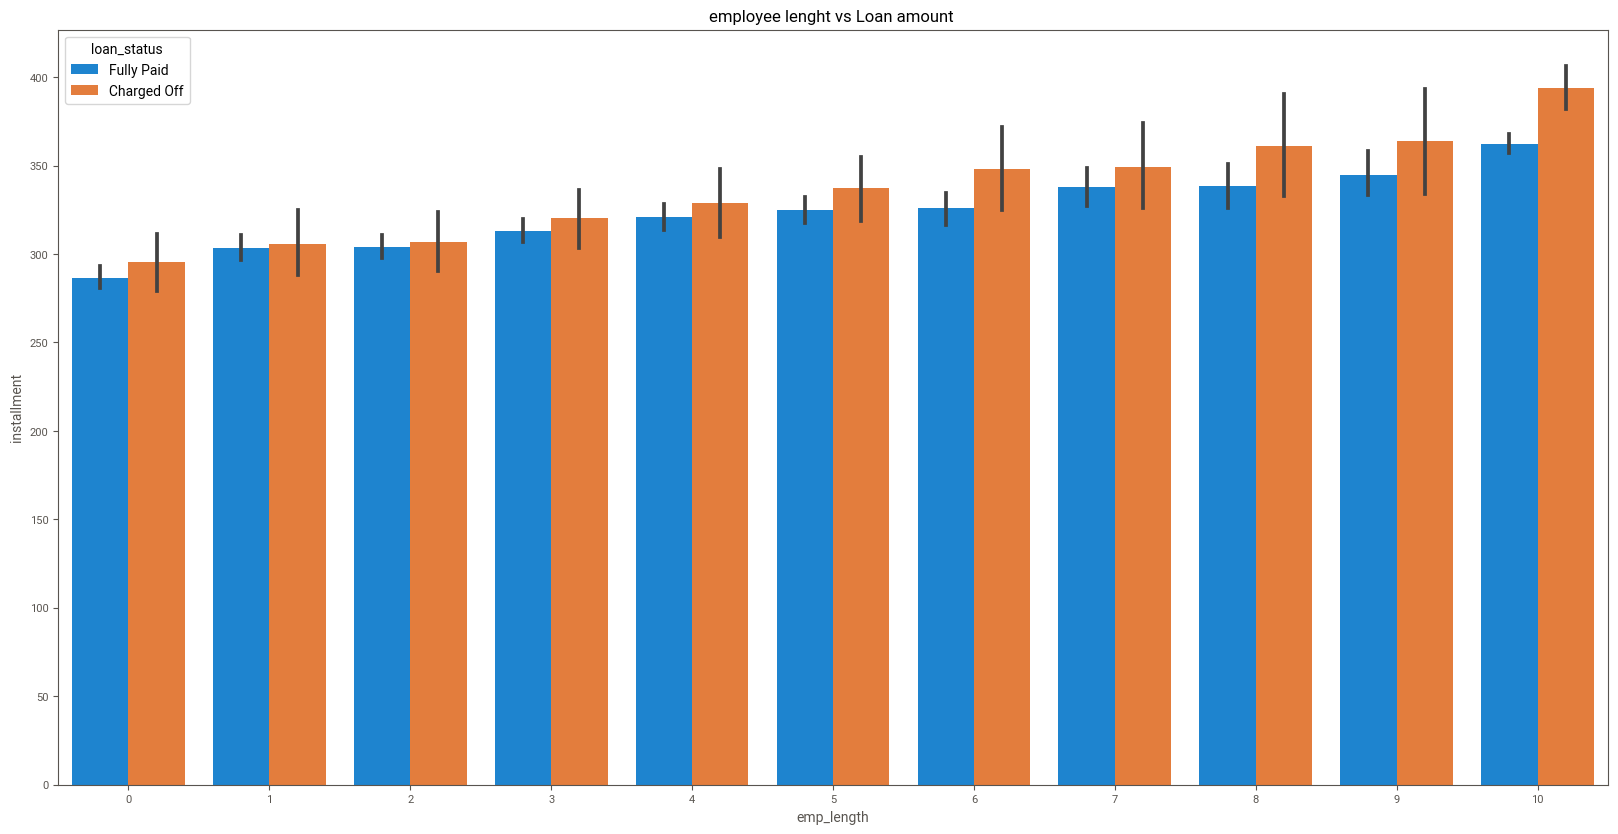

In [509]:
plt.figure(figsize=(20,10))

sns.barplot(x='emp_length', y='installment' , data=df_final , hue="loan_status")
plt.title('employee lenght vs Loan amount ')
plt.show()

In [538]:
df_final.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0


In [537]:
df_final.groupby(["emp_length"])["loan_amnt"].count().reset_index().sort_values(by="loan_amnt", ascending=False)

,emp_length,loan_amnt
10,10,8886
0,0,4573
2,2,4387
3,3,4090
4,4,3429
5,5,3279
1,1,3236
6,6,2224
7,7,1770
8,8,1480


In [539]:
df_final.groupby(["loan_status"])["loan_amnt"].count().reset_index().sort_values(by="loan_amnt", ascending=False)

,loan_status,loan_amnt
1,Fully Paid,33197
0,Charged Off,5415


In [540]:
df_final.groupby(["loan_status"])["term"].count().reset_index().sort_values(by="term", ascending=False)

,loan_status,term
1,Fully Paid,33197
0,Charged Off,5415


In [541]:
df_final.groupby(["purpose", "verification_status"])["loan_status"].count().reset_index().sort_values(by="loan_status", ascending=False)

,purpose,verification_status,loan_status
6,debt_consolidation,Not Verified,7172
8,debt_consolidation,Verified,6531
7,debt_consolidation,Source Verified,4536
3,credit_card,Not Verified,2220
27,other,Not Verified,1992
5,credit_card,Verified,1601
12,home_improvement,Not Verified,1181
4,credit_card,Source Verified,1178
18,major_purchase,Not Verified,1009
14,home_improvement,Verified,981


In [542]:
df_final.groupby(["purpose"])["loan_status"].count().reset_index().sort_values(by="loan_status", ascending=False)

,purpose,loan_status
2,debt_consolidation,18239
1,credit_card,4999
9,other,3821
4,home_improvement,2883
6,major_purchase,2108
11,small_business,1779
0,car,1497
13,wedding,934
7,medical,668
8,moving,557


In [543]:
df_final.groupby(["verification_status"])["loan_status"].count().reset_index().sort_values(by="loan_status", ascending=False)

,verification_status,loan_status
0,Not Verified,16466
2,Verified,12354
1,Source Verified,9792


In [545]:
verification_status_home_ownership_loan_status=df_final.groupby(["verification_status", "home_ownership"])["loan_status"].count().reset_index().sort_values(by="loan_status", ascending=False)

In [546]:
verification_status_home_ownership_loan_status

,verification_status,home_ownership,loan_status
4,Not Verified,RENT,8183
0,Not Verified,MORTGAGE,6853
9,Verified,MORTGAGE,6448
12,Verified,RENT,5138
8,Source Verified,RENT,5130
5,Source Verified,MORTGAGE,3925
3,Not Verified,OWN,1377
11,Verified,OWN,732
7,Source Verified,OWN,727
2,Not Verified,OTHER,50


In [548]:
df_final.groupby(["verification_status", "home_ownership", "annual_inc", "int_rate"])["loan_status"].count().reset_index().sort_values(by="loan_status", ascending=False)

,verification_status,home_ownership,annual_inc,int_rate,loan_status
29899,Verified,RENT,60000.0,10.99,11
2318,Not Verified,MORTGAGE,60000.0,5.42,11
29923,Verified,RENT,60000.0,13.49,11
22896,Verified,MORTGAGE,60000.0,11.99,10
11274,Not Verified,RENT,60000.0,10.99,10
...,...,...,...,...,...
11745,Not Verified,RENT,66000.0,10.62,1
11744,Not Verified,RENT,66000.0,10.39,1
11743,Not Verified,RENT,66000.0,10.25,1
11740,Not Verified,RENT,66000.0,9.32,1
